In [ ]:
import multiprocessing
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def merge(left, right): # hàm trộn hai mảng left và right
    result = []
    i = j = 0

    while i < len(left) and j < len(right):
        if left[i] < right[j]: # đưa phần tử nhỏ hơn trong 2 mảng vào trong mảng kết quả
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1

    result.extend(left[i:]) # đưa tất cả phần tử còn lại trong 2 mảng vào mảng kết quả
    result.extend(right[j:])

    return result # trả lại kết quả

In [ ]:
def MergeSort(arr): # hàm thực hiện sắp xếp trộn
    if len(arr) <= 1: # nếu độ dài dãy là 1 thì trả lại dãy
        return arr

    mid = len(arr) // 2 # lấy index ở giữa

    left = MergeSort(arr[:mid]) # gọi đệ quy merge sort cho 2 phần trái và phải
    right = MergeSort(arr[mid:])

    return merge(left, right) # trả lại mảng đã được sắp xếp trộn 2 phần left và right

In [ ]:
def ParallelMergeSort(arr, numCore): # hàm thực hiện thuật toán merge sort song song với numCore là số bộ xử lý
    if len(arr) <= 1:
        return arr

    chunks = []
    div, mod = divmod(len(arr), numCore)
    remain = 0
    id = 0
    while id < len(arr): # làm một vòng lặp lấy vị trí
        remain = 0
        if mod > 0:
            remain = 1
            mod -= 1
        chunks.append(arr[id:id + div + remain]) # chunks[i] lưu lại các phần tử trong dãy thứ i
        id += div + remain

    with multiprocessing.Pool(processes=numCore) as pool:
        sortedChunks = pool.map(MergeSort, chunks) # thực hiện sắp xếp trộn cho từng bộ xử lý thông qua phương thức pool

        while len(sortedChunks) > 1: # khi vẫn còn chunk chưa xử lý
            nextChunks = []
            for i in range(0, len(sortedChunks), 2): # xét từng dãy thứ i đã được sắp xếp, sắp xếp lại 2 dãy i và i + 1 bằng phương pháp trộn
                if i + 1 < len(sortedChunks):
                    nextChunks.append(merge(sortedChunks[i], sortedChunks[i + 1]))
                else:
                    nextChunks.append(sortedChunks[i])
            sortedChunks = nextChunks

        return sortedChunks[0] # trả lại kết quả cuối cùng

In [ ]:
def RunningTime(func, arr, numCore): # hàm tính toán thời gian chạy của hàm func với một dãy
    start = time.time() # thời gian bắt đầu
    if numCore != -1: # nếu numCore khác -1 thì thực hiện merge sort song song
        func(arr, numCore)
    else: # ngược lại thực hiện merge sort tuần từ
        func(arr)
    end = time.time() # thời gian kết thúc
    return end - start # tổng thời gian thực hiện

N = 10
Sequential: 7.224082946777344e-05
2 cores: 0.03586578369140625
5 cores: 0.05252337455749512
8 cores: 0.08617234230041504
10 cores: 0.09357213973999023
N = 50
Sequential: 0.0001392364501953125
2 cores: 0.023288726806640625
5 cores: 0.04572916030883789
8 cores: 0.07180476188659668
10 cores: 0.08764290809631348
N = 100
Sequential: 0.000446319580078125
2 cores: 0.03418540954589844
5 cores: 0.04352855682373047
8 cores: 0.07204246520996094
10 cores: 0.08984756469726562
N = 500
Sequential: 0.0018808841705322266
2 cores: 0.03664731979370117
5 cores: 0.06046652793884277
8 cores: 0.07466793060302734
10 cores: 0.10512709617614746
N = 1000
Sequential: 0.005542755126953125
2 cores: 0.02980637550354004
5 cores: 0.05094575881958008
8 cores: 0.08179354667663574
10 cores: 0.08974552154541016
N = 5000
Sequential: 0.021536827087402344
2 cores: 0.04905080795288086
5 cores: 0.07874321937561035
8 cores: 0.11698579788208008
10 cores: 0.11925745010375977
N = 10000
Sequential: 0.042980194091796875
2 cor

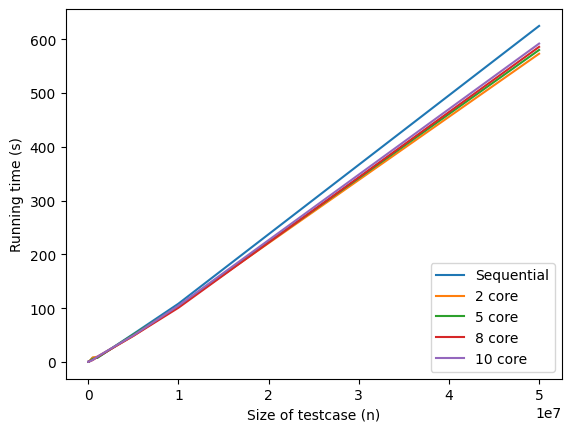

In [ ]:
if __name__ == '__main__':
    value = 1
    nSize = []
    for i in range(1, 8):
      value *= 10
      nSize.append(value)
      nSize.append(value * 5)
    core = [-1, 2, 5, 8, 10] # khởi tạo các core
    stoTime = [[] for _ in core] # lấy một mảng lưu thời gian ứng với core[i]
    for i in range(len(nSize)):
        n = nSize[i]
        arr = []
        for i in range(n):
            arr.append(np.random.randint(0, 1000001)) # bỏ random giá trị vào mảng
        for i in range(len(core)):
            if core[i] != -1: # nếu số core khác -1 thì thực hiện merge sort parallel
                stoTime[i].append(RunningTime(ParallelMergeSort, arr, core[i]))
            else: # ngược lại làm merge sort tuần tự
                stoTime[i].append(RunningTime(MergeSort, arr, core[i]))

        print("N =", n)
        for i in range(len(core)):
            if core[i] == -1:
                print("Sequential", end = "")
            else:
                print(str(core[i]) + " cores", end ="")
            print(":", stoTime[i][-1])
    for i in range(len(core)):
      if core[i] == -1:
        label = 'Sequential'
      else:
        label = str(core[i]) + ' core'
      plt.plot(nSize, stoTime[i], label=label)
      plt.legend(loc='lower right')

    plt.xlabel("Size of testcase (n)")
    plt.ylabel("Running time (s)")
    plt.show()